In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from pandas import DataFrame 
import math 
from scipy.stats import mannwhitneyu

df_initial = pd.read_excel('./thewhyprobs.xlsx', names=['time','name','ID','perc_P_50c','perc_R_50c',
                                            'perc_P_20','perc_R_20','region'])


del df_initial['time']
del df_initial['name']
del df_initial['ID']

## deleting values outside of possible ranges 

indexNames = df_initial[((df_initial['perc_P_50c'] > 50) | (df_initial['perc_P_50c'] < 0))
                        & ((df_initial['perc_R_50c'] < 0) | (df_initial['perc_R_50c'] > 50)) 
                        & ((df_initial['perc_P_20'] < 0) | (df_initial['perc_P_20'] > 20))
                        & ((df_initial['perc_R_20'] < 0) | (df_initial['perc_R_20'] > 20))].index

## returns which ID is invalid according to possible range
print(indexNames)

## deletes values outside range of the dataframe 

df = df_initial.drop(indexNames)


## setting up for dutch vs. non dutch comparison 

df_dutch = df[(df['region'] == 'Dutch')]


df_nondutch = df[(df['region'] != 'Dutch')]

print(df_dutch)
print(df_nondutch)

##counts how many inputs in each 

print(df_dutch.count())
print(df_nondutch.count())


## no need to print these because it's just formatting data for analysis


Int64Index([8], dtype='int64')
   perc_P_50c  perc_R_50c  perc_P_20  perc_R_20 region
0          25          25          5          5  Dutch
3          10          33         10          5  Dutch
4          34          12         10          5  Dutch
5          10          10         10         15  Dutch
6          20          25          2         10  Dutch
   perc_P_50c  perc_R_50c  perc_P_20  perc_R_20     region
1          10          50          5         10  Non-Dutch
2          10          25         10          5  Non-Dutch
7          50          20          1          1  Non-Dutch
perc_P_50c    5
perc_R_50c    5
perc_P_20     5
perc_R_20     5
region        5
dtype: int64
perc_P_50c    3
perc_R_50c    3
perc_P_20     3
perc_R_20     3
region        3
dtype: int64


In [9]:
## EVERYTIME you run this, run the first box FIRST or else you will divide again and again

df_dutch[['perc_P_50c','perc_R_50c']] = df_dutch[['perc_P_50c','perc_R_50c']]/50
df_dutch[['perc_P_20','perc_R_20']] = df_dutch[['perc_P_20','perc_R_20']]/20

df_nondutch[['perc_P_20','perc_R_20']] = df_nondutch[['perc_P_20','perc_R_20']]/20
df_nondutch[['perc_P_50c','perc_R_50c']] = df_nondutch[['perc_P_50c','perc_R_50c']]/50

print (df_dutch)
print (df_nondutch)

   perc_P_50c  perc_R_50c  perc_P_20  perc_R_20 region
0        0.50        0.50       0.25       0.25  Dutch
3        0.20        0.66       0.50       0.25  Dutch
4        0.68        0.24       0.50       0.25  Dutch
5        0.20        0.20       0.50       0.75  Dutch
6        0.40        0.50       0.10       0.50  Dutch
   perc_P_50c  perc_R_50c  perc_P_20  perc_R_20     region
1         0.2         1.0       0.25       0.50  Non-Dutch
2         0.2         0.5       0.50       0.25  Non-Dutch
7         1.0         0.4       0.05       0.05  Non-Dutch


Test Dutch vs. Non-Dutch for Proposers when Payoff is 20
Statistics=5.000, p=0.261
Same distribution (fail to reject H0)
               
median of dutch proposer 20 is:
0.5
median of non-dutch proposer 20 is:
0.25
               
mean of dutch proposer 20 is:
0.37
mean of non-dutch proposer 20 is:
0.26666666666666666


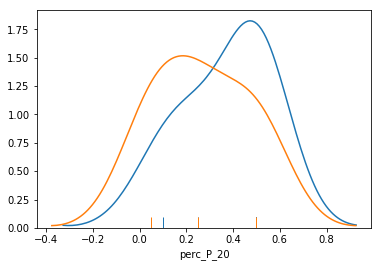

In [10]:
## PROPOSER, PAYOFF = 20, DUTCH VS. NON DUTCH

from scipy.stats import mannwhitneyu
print('Test Dutch vs. Non-Dutch for Proposers when Payoff is 20')
stat, p = mannwhitneyu(df_dutch['perc_P_20'], df_nondutch['perc_P_20'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

sns_1 = sns.distplot(df_dutch['perc_P_20'], hist=False, rug=True);  ##blue
sns_2 = sns.distplot(df_nondutch['perc_P_20'], hist=False, rug=True);  ##orange

sns_1.figure.savefig("plot_P20_D")
sns_2.figure.savefig("plot_P20_ND")

print("               ")
print("median of dutch proposer 20 is:")
print(df_dutch['perc_P_20'].median())
print("median of non-dutch proposer 20 is:")
print(df_nondutch['perc_P_20'].median())

print("               ")
print("mean of dutch proposer 20 is:")
print(df_dutch['perc_P_20'].mean())
print("mean of non-dutch proposer 20 is:")
print(df_nondutch['perc_P_20'].mean())




Test Dutch vs. Non-Dutch for Proposers when Payoff is 50c
Statistics=7.000, p=0.500
Same distribution (fail to reject H0)
               
median of dutch proposer 20 is:
0.4
median of non-dutch proposer 20 is:
0.2
               
mean of dutch proposer 20 is:
0.396
mean of non-dutch proposer 20 is:
0.4666666666666666


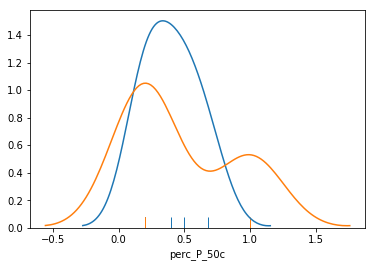

In [11]:
## PROPOSER, PAYOFF = 50 cents, DUTCH VS. NON DUTCH

from scipy.stats import mannwhitneyu
print('Test Dutch vs. Non-Dutch for Proposers when Payoff is 50c')
stat, p = mannwhitneyu(df_dutch['perc_P_50c'], df_nondutch['perc_P_50c'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

sns_3 = sns.distplot(df_dutch['perc_P_50c'], hist=False, rug=True);  ##blue
sns_4 = sns.distplot(df_nondutch['perc_P_50c'], hist=False, rug=True);  ##orange

sns_3.figure.savefig("plot_P50_D")
sns_4.figure.savefig("plot_P50_ND")

print("               ")
print("median of dutch proposer 20 is:")
print(df_dutch['perc_P_50c'].median())
print("median of non-dutch proposer 20 is:")
print(df_nondutch['perc_P_50c'].median())

print("               ")
print("mean of dutch proposer 20 is:")
print(df_dutch['perc_P_50c'].mean())
print("mean of non-dutch proposer 20 is:")
print(df_nondutch['perc_P_50c'].mean())

Test Dutch vs. Non-Dutch for Responders when Payoff is 20
Statistics=5.000, p=0.261
Same distribution (fail to reject H0)
               
median of dutch responder 20 is:
0.25
median of non-dutch responder 20 is:
0.25
               
mean of dutch responder 20 is:
0.4
mean of non-dutch responder 20 is:
0.26666666666666666


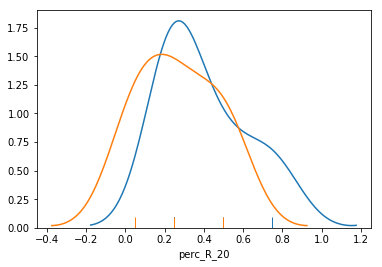

In [12]:
## RESPONDER, PAYOFF = 20, DUTCH VS. NON DUTCH

from scipy.stats import mannwhitneyu
print('Test Dutch vs. Non-Dutch for Responders when Payoff is 20')
stat, p = mannwhitneyu(df_dutch['perc_R_20'], df_nondutch['perc_R_20'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
sns_5 = sns.distplot(df_dutch['perc_R_20'], hist=False, rug=True);  ##blue
sns_6 = sns.distplot(df_nondutch['perc_R_20'], hist=False, rug=True);  ##orange

sns_5.figure.savefig("plot_R20_D")
sns_6.figure.savefig("plot_R20_ND")

print("               ")
print("median of dutch responder 20 is:")
print(df_dutch['perc_R_20'].median())
print("median of non-dutch responder 20 is:")
print(df_nondutch['perc_R_20'].median())

print("               ")
print("mean of dutch responder 20 is:")
print(df_dutch['perc_R_20'].mean())
print("mean of non-dutch responder 20 is:")
print(df_nondutch['perc_R_20'].mean())

Test Dutch vs. Non-Dutch for Responders when Payoff is 50c
Statistics=5.000, p=0.271
Same distribution (fail to reject H0)
               
median of dutch responder 20 is:
0.25
median of non-dutch responder 20 is:
0.25
               
mean of dutch responder 20 is:
0.4
mean of non-dutch responder 20 is:
0.26666666666666666


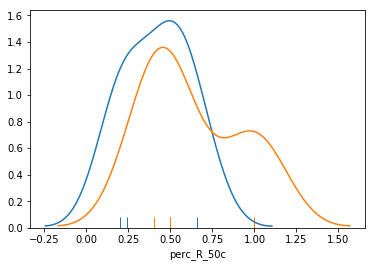

In [13]:
## RESPONDER, PAYOFF = 50c, DUTCH VS. NON DUTCH

from scipy.stats import mannwhitneyu
print('Test Dutch vs. Non-Dutch for Responders when Payoff is 50c')
stat, p = mannwhitneyu(df_dutch['perc_R_50c'], df_nondutch['perc_R_50c'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

sns_7 = sns.distplot(df_dutch['perc_R_50c'], hist=False, rug=True);  ##blue
sns_8 = sns.distplot(df_nondutch['perc_R_50c'], hist=False, rug=True);  ##orange

sns_7.figure.savefig("plot_R50_D")
sns_8.figure.savefig("plot_R50_ND")

print("               ")
print("median of dutch responder 20 is:")
print(df_dutch['perc_R_20'].median())
print("median of non-dutch responder 20 is:")
print(df_nondutch['perc_R_20'].median())

print("               ")
print("mean of dutch responder 20 is:")
print(df_dutch['perc_R_20'].mean())
print("mean of non-dutch responder 20 is:")
print(df_nondutch['perc_R_20'].mean())